In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.svm import SVC

### Problem 1

In [3]:
data_train = np.loadtxt("homework_7_data_train.txt")
X_train = data_train[:,0:2]    
Y_train = data_train[:,2]

data_test = np.loadtxt("homework_7_data_test.txt")
X_test = data_test[:,0:2]    
Y_test = data_test[:,2]

In [4]:
#train the model
svm_model_obj = SVC(kernel='poly', degree=2)   
svm_model_obj.fit(X_train, Y_train) 

#print the performance
Y_hat = svm_model_obj.predict(X_train)

p = sklearn.metrics.precision_score(Y_train, Y_hat) 
r = sklearn.metrics.recall_score(Y_train, Y_hat)

print("Training precision: ", p)
print("Training recall: ", r)

print("\n")
Y_hat_t = svm_model_obj.predict(X_test)

p = sklearn.metrics.precision_score(Y_test, Y_hat_t) 
r = sklearn.metrics.recall_score(Y_test, Y_hat_t)

print("Test precision: ", p)
print("Test recall: ", r)

Training precision:  0.9607843137254902
Training recall:  1.0


Test precision:  0.9259259259259259
Test recall:  1.0


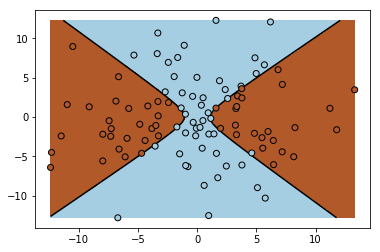

In [5]:
#plot the decision boundary + test data
plt.figure()
plt.clf()

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.Paired, edgecolor='k', zorder=10)               


plt.axis('tight')       
x_min = X_test[:, 0].min()
x_max = X_test[:, 0].max()
y_min = X_test[:, 1].min()
y_max = X_test[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = svm_model_obj.decision_function(np.c_[XX.ravel(), YY.ravel()])  
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)  

plt.contour(XX, YY, Z, colors=['k'], linestyles=['-'], levels=[0])

plt.show()

### Problem 2a

In [6]:
#train the model
svm_model_obj = SVC(kernel='rbf', gamma='auto')   
svm_model_obj.fit(X_train, Y_train) 

#print the performance
Y_hat = svm_model_obj.predict(X_train)

p = sklearn.metrics.precision_score(Y_train, Y_hat) 
r = sklearn.metrics.recall_score(Y_train, Y_hat)

print("Training precision: ", p)
print("Training recall: ", r)

print("\n")
Y_hat_t = svm_model_obj.predict(X_test)

p_t = sklearn.metrics.precision_score(Y_test, Y_hat_t) 
r_t = sklearn.metrics.recall_score(Y_test, Y_hat_t)

print("Test precision: ", p_t)
print("Test recall: ", r_t)

Training precision:  1.0
Training recall:  1.0


Test precision:  0.8392857142857143
Test recall:  0.94


### Problem 2b

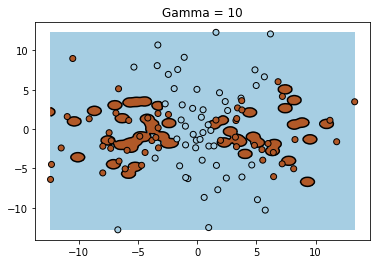

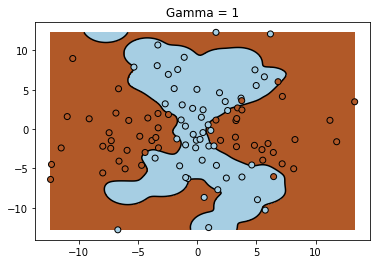

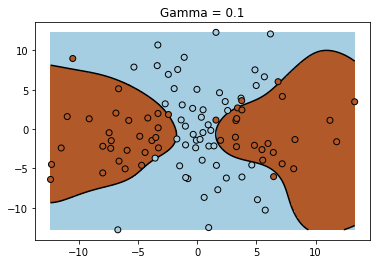

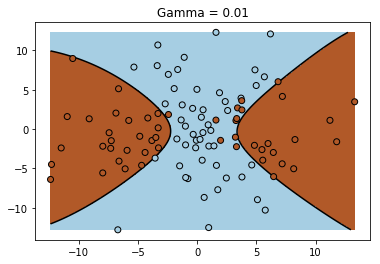

In [7]:
gammas = [10, 1, 0.1, 0.01]

for g in gammas:
    svm_model_obj = SVC(kernel='rbf', gamma=g)   
    svm_model_obj.fit(X_train, Y_train) 
    
    plt.figure()
    plt.clf()

    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.Paired, edgecolor='k', zorder=10)               


    plt.axis('tight')       
    x_min = X_test[:, 0].min()
    x_max = X_test[:, 0].max()
    y_min = X_test[:, 1].min()
    y_max = X_test[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm_model_obj.decision_function(np.c_[XX.ravel(), YY.ravel()])  
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)  

    plt.contour(XX, YY, Z, colors=['k'], linestyles=['-'], levels=[0])

    plt.title("Gamma = " + str(g))
    plt.show()

### Problem 2c

In [8]:
data_val = np.loadtxt("homework_7_data_validation.txt")
X_val = data_val[:,0:2]    
Y_val = data_val[:,2]

for g in gammas:
    svm_model_obj = SVC(kernel='rbf', gamma=g)   
    svm_model_obj.fit(X_train, Y_train) 
    
    Y_hat = svm_model_obj.predict(X_val)

    p = sklearn.metrics.precision_score(Y_val, Y_hat) 
    r = sklearn.metrics.recall_score(Y_val, Y_hat)
    fone = 2*((p*r)/(p+r))

    print("========" + " Gamma: " + str(g) + " =========")
    print("Validation precision: ", p)
    print("Validation recall: ", r)
    print("Validation F1: ", fone)

    print("\n")
    Y_hat_t = svm_model_obj.predict(X_test)

    p_t = sklearn.metrics.precision_score(Y_test, Y_hat_t) 
    r_t = sklearn.metrics.recall_score(Y_test, Y_hat_t)
    fone_t = 2*((p_t*r_t)/(p+r_t))
    
    print("Test precision: ", p_t)
    print("Test recall: ", r_t)
    print("Test F1: ", fone_t)
    print("=============================")
    
    print("\n")

======== Gamma: 10 =========
Validation precision:  0.9230769230769231
Validation recall:  0.2926829268292683
Validation F1:  0.4444444444444444


Test precision:  0.9285714285714286
Test recall:  0.26
Test F1:  0.4081367267323054


======== Gamma: 1 =========
Validation precision:  0.8085106382978723
Validation recall:  0.926829268292683
Validation F1:  0.8636363636363636


Test precision:  0.7966101694915254
Test recall:  0.94
Test F1:  0.8565158746199949


======== Gamma: 0.1 =========
Validation precision:  0.9736842105263158
Validation recall:  0.9024390243902439
Validation F1:  0.9367088607594938


Test precision:  0.9777777777777777
Test recall:  0.88
Test F1:  0.9283614108145625


======== Gamma: 0.01 =========
Validation precision:  1.0
Validation recall:  0.6097560975609756
Validation F1:  0.7575757575757575


Test precision:  1.0
Test recall:  0.78
Test F1:  0.8764044943820225




Gamma = 0.1 achieves the highest F1 score. In general when validating you sweep hyperparameters with a finer resolution.

### Bonus

There are three kinds of conic sections: notice the boundaries look like a hyperbola. The data was generated by evaluating random points in the x-y plane as $f(x,y) = x^2 - y^2 + \epsilon$ where $\epsilon$ is a small amount of Gaussian noise; if $f(x,y) > c$ (c happens to equal 1) then the data point $(x,y)$ is labeled class 1, otherwise the data point is labeled class zero.